# Stellar Classification  

| Column Name | Description |
|-------------|-------------|
| `obj_ID` | Object Identifier, the unique value that identifies the object in the image catalog used by the CAS |
| `alpha` | Right Ascension angle (at J2000 epoch) |
| `delta` | Declination angle (at J2000 epoch) |
| `u` | Ultraviolet filter in the photometric system |
| `g` | Green filter in the photometric system |
| `r` | Red filter in the photometric system |
| `i` | Near Infrared filter in the photometric system |
| `z` | Infrared filter in the photometric system |
| `run_ID` | Run Number used to identify the specific scan |
| `rerun_ID` | Rerun Number to specify how the image was processed |
| `cam_col` | Camera column to identify the scanline within the run |
| `field_ID` | Field number to identify each field |
| `spec_obj_ID` | Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class) |
| `class` | Object class (galaxy, star, or quasar object) |
| `redshift` | Redshift value based on the increase in wavelength |
| `plate` | Plate ID, identifies each plate in SDSS |
| `MJD` | Modified Julian Date, used to indicate when a given piece of SDSS data was taken |
| `fiber_ID` | Fiber ID that identifies the fiber that pointed the light at the focal plane in each observation |


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

### Load and exploration of the dataset

In [2]:
filename = 'star_classification.csv'
data = pd.read_csv(filename)
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [3]:
rows,columns = data.shape
print(f"Number of rows/examples: {rows}")
print(f"Number of columns/features: {columns}")

Number of rows/examples: 100000
Number of columns/features: 18


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
obj_ID,100000.0,1.237665e+18,8.438560e+12,1.237646e+18,1.237659e+18,1.237663e+18,1.237668e+18,1.237681e+18
alpha,100000.0,1.776291e+02,9.650224e+01,5.527828e-03,1.275182e+02,1.809007e+02,2.338950e+02,3.599998e+02
delta,100000.0,2.413530e+01,1.964467e+01,-1.878533e+01,5.146771e+00,2.364592e+01,3.990155e+01,8.300052e+01
u,100000.0,2.198047e+01,3.176929e+01,-9.999000e+03,2.035235e+01,2.217914e+01,2.368744e+01,3.278139e+01
g,100000.0,2.053139e+01,3.175029e+01,-9.999000e+03,1.896523e+01,2.109983e+01,2.212377e+01,3.160224e+01
r,100000.0,1.964576e+01,1.854760e+00,9.822070e+00,1.813583e+01,2.012529e+01,2.104478e+01,2.957186e+01
i,100000.0,1.908485e+01,1.757895e+00,9.469903e+00,1.773228e+01,1.940514e+01,2.039650e+01,3.214147e+01
z,100000.0,1.866881e+01,3.172815e+01,-9.999000e+03,1.746068e+01,1.900460e+01,1.992112e+01,2.938374e+01
run_ID,100000.0,4.481366e+03,1.964765e+03,1.090000e+02,3.187000e+03,4.188000e+03,5.326000e+03,8.162000e+03
rerun_ID,100000.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02


In [6]:
#we check for missing values
missing_values = data.isnull().sum()
print(missing_values)


obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64


In [7]:
data["class"].value_counts() # class = object class (galaxy, star or quasar object)

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

Data Visualization and Exploration

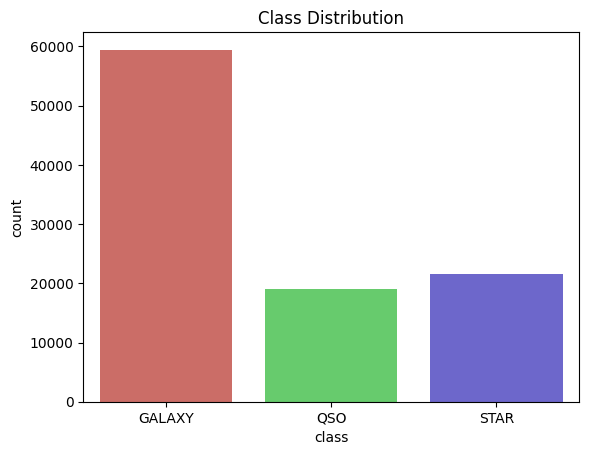

In [8]:
sns.countplot(x="class", data=data, palette="hls")
plt.title("Class Distribution")
plt.show()


We will encode the values of the target variable `class` to integers because they are not presented numerically.

In [9]:
LE = LabelEncoder()
data["class"] = LE.fit_transform(data["class"])
print("New class values: 0 for GALAXY, 1 for STAR, 2 for QUASAR")
print(data["class"].value_counts())


New class values: 0 for GALAXY, 1 for STAR, 2 for QUASAR
0    59445
2    21594
1    18961
Name: class, dtype: int64


We will chech for the values that have the least correlation with the target variable and remove them from the dataset.

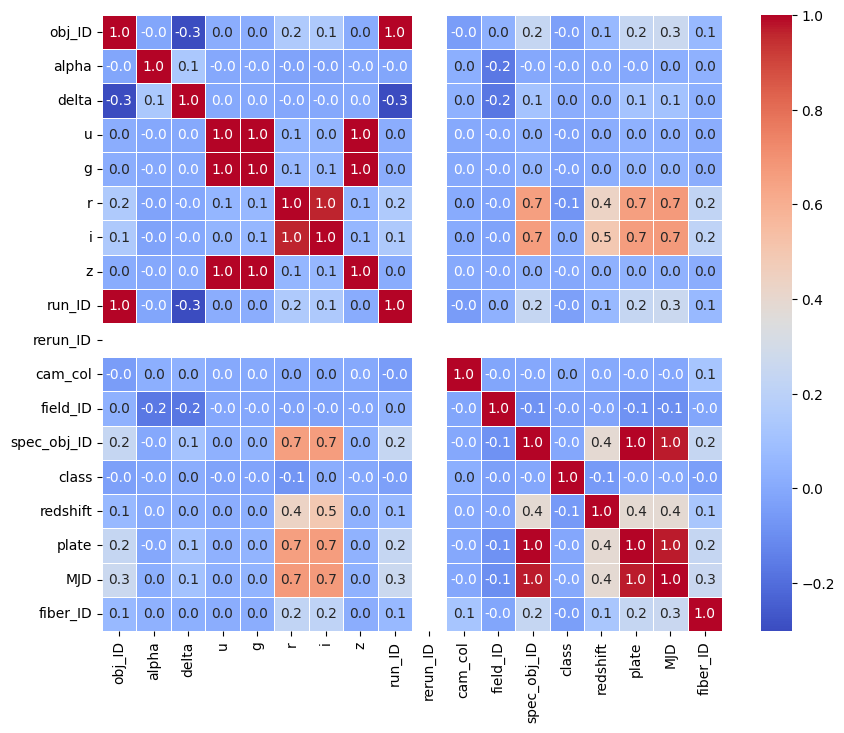

In [10]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

From the correlation matrix: 

In [11]:
data= data.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'], axis = 1)

We split the dataset into X and Y, and then into training and testing sets.

In [12]:
X = data.drop("class", axis=1)
Y = data["class"]
X

,u,g,r,i,z,spec_obj_ID,redshift,plate,MJD
0,23.87882,22.27530,20.39501,19.16573,18.79371,6.543777e+18,0.634794,5812,56354
1,24.77759,22.83188,22.58444,21.16812,21.61427,1.176014e+19,0.779136,10445,58158
2,25.26307,22.66389,20.60976,19.34857,18.94827,5.152200e+18,0.644195,4576,55592
3,22.13682,23.77656,21.61162,20.50454,19.25010,1.030107e+19,0.932346,9149,58039
4,19.43718,17.58028,16.49747,15.97711,15.54461,6.891865e+18,0.116123,6121,56187
...,...,...,...,...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569,1.055431e+19,0.000000,9374,57749
99996,22.69118,22.38628,20.45003,19.75759,19.41526,8.586351e+18,0.404895,7626,56934
99997,21.16916,19.26997,18.20428,17.69034,17.35221,3.112008e+18,0.143366,2764,54535
99998,25.35039,21.63757,19.91386,19.07254,18.62482,7.601080e+18,0.455040,6751,56368


We will perform data standardization to balance the scale of the features to facilitate the training of the model.

In [13]:
standard = StandardScaler()
X = standard.fit_transform(X)

We split into training and test sets: 80% of the data will be used for training and 20% for testing.

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")


X_train shape: (80000, 9)
X_test shape: (20000, 9)
Y_train shape: (80000,)
Y_test shape: (20000,)
